Mean amplitude of Total Protein: 2.673413469707947
Mean period of Total Protein: 22.28909090909091


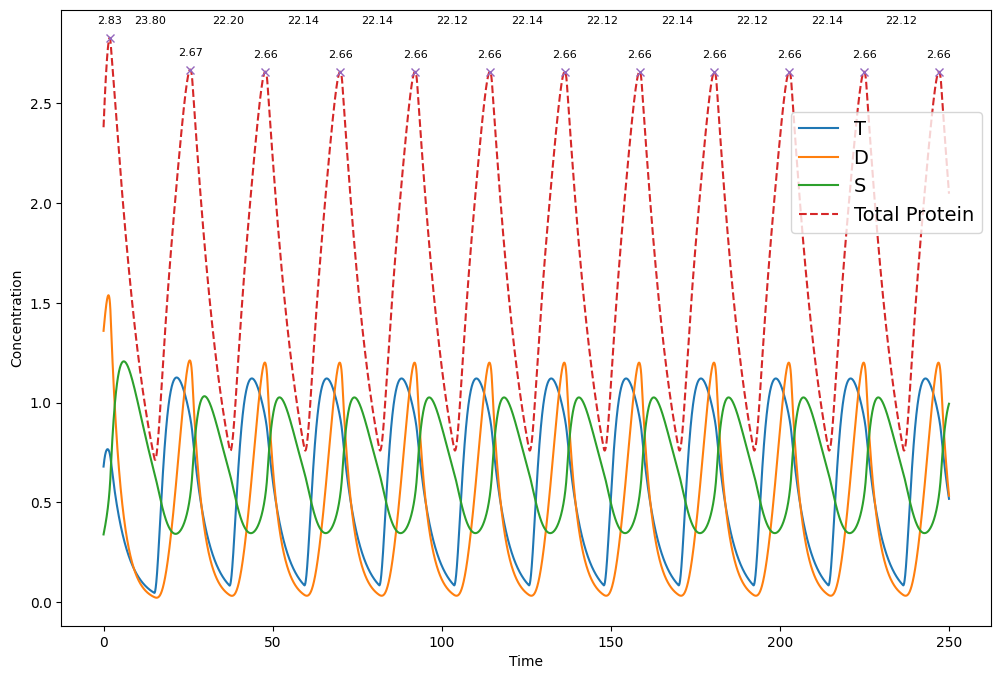

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function representing the differential equations
def kaiABC_Rust(c, t, Temp):
    # Variables

    T = c[0]
    ST = c[1]
    S = c[2]

    KaiA = 1.3
    Temp = 298.15  # the rates that are temp compensated kept fixed at 298k
    
    # Parameters calculated by Arrhenius, pre-exponential term determined as 383.83
    khalf = 383.83 * np.exp(-(16.8330449e3) / (8.3144598 * Temp))
    
    kUT0 = 0.0
    kUTA = 383.83 * np.exp(-(16.56527851e3) / (8.3144598 * Temp))
   
    kDT0 = 0.0
    kDTA = 383.83 * np.exp(-(19.08885839e3) / (8.3144598 * Temp))
   
    kTU0 = 383.83 * np.exp(-(18.60866545e3) / (8.3144598 * Temp))
    kTUA = 383.83 * np.exp(-(21.0046209e3) / (8.3144598 * Temp))
    
    kTD0 = 0.0
    kTDA = 383.83 * np.exp(-(18.5744178e3) / (8.3144598 * Temp))
   
    kSD0 = 0.0
    kSDA = 383.83 * np.exp(-(16.43132499e3) / (8.3144598 * Temp))
    
    kDS0 = 383.83 * np.exp(-(17.64373845e3) / (8.3144598 * Temp))
    kDSA = 383.83 * (-np.exp(-(17.56984493e3) / (8.3144598 * Temp)))
    
    kUS0 = 0.0
    kUSA = 383.83 * np.exp(-(22.00905957e3) / (8.3144598 * Temp))
    
    kSU0 = 383.83 * np.exp(-(20.21073081e3) / (8.3144598 * Temp))
    kSUA = 383.83 * (-np.exp(-(19.73888331e3) / (8.3144598 * Temp)))
    
    KaiC = 3.4

    U = max(0, KaiC - T - ST - S)
    A = max(0, 1.3 - 2. * S)

    # Parameters defined as function
    kUT = kUT0 + ((kUTA * A) / (khalf + A))
    kDT = kDT0 + ((kDTA * A) / (khalf + A))
    kTU = kTU0 + ((kTUA * A) / (khalf + A))
    kTD = kTD0 + ((kTDA * A) / (khalf + A))
    kSD = kSD0 + ((kSDA * A) / (khalf + A))
    kDS = kDS0 + ((kDSA * A) / (khalf + A))
    kUS = kUS0 + ((kUSA * A) / (khalf + A))
    kSU = kSU0 + ((kSUA * A) / (khalf + A))
    
    # Differential equations
    dTdt = (kUT * U + kDT * ST - kTU * T - kTD * T)
    dSTdt = (kTD * T + kSD * ST - kDT * ST - kDS * ST)
    dSdt = (kUS * U + kDS * ST - kSU * S - kSD * S)
    
    return [dTdt, dSTdt, dSdt]

# Main script for 298.15K
Temp = 298.15

t0 = 0
tf = 250

tspan = np.arange(t0, tf, 0.02)
css = [0.68, 1.36, 0.34]

sol = odeint(kaiABC_Rust, css, tspan, args=(Temp,))
T_val = sol[:, 0]
ST_val = sol[:, 1]
S_val = sol[:, 2]

# Calculate total protein concentration over time
total_protein = T_val + ST_val + S_val

# Analyzing the amplitude and period of the total protein
peaks, _ = find_peaks(total_protein)
amplitudes = total_protein[peaks]

if len(peaks) > 1:
    periods = np.diff(tspan[peaks])
    mean_period = np.mean(periods)
else:
    mean_period = np.nan

mean_amplitude = np.mean(amplitudes)

print(f'Mean amplitude of Total Protein: {mean_amplitude}')
print(f'Mean period of Total Protein: {mean_period}')

# Plotting results
plt.figure(figsize=(12, 8))
plt.plot(tspan, T_val, label='T')
plt.plot(tspan, ST_val, label='D')
plt.plot(tspan, S_val, label='S')
plt.plot(tspan, total_protein, label='Total Protein', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, .85))


# Highlight peaks of total protein
plt.plot(tspan[peaks], total_protein[peaks], "x")

# Annotate peaks with amplitude and period for total protein
for i in range(len(peaks)):
    plt.annotate(f'{total_protein[peaks[i]]:.2f}', (tspan[peaks[i]], total_protein[peaks[i]]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    if i > 0:
        plt.annotate(f'{tspan[peaks[i]] - tspan[peaks[i-1]]:.2f}', 
                     ((tspan[peaks[i]] + tspan[peaks[i-1]]) / 2, max(total_protein)), 
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()


Mean amplitude of Total Protein: 2.673413469707947
Mean period of Total Protein: 22.28909090909091


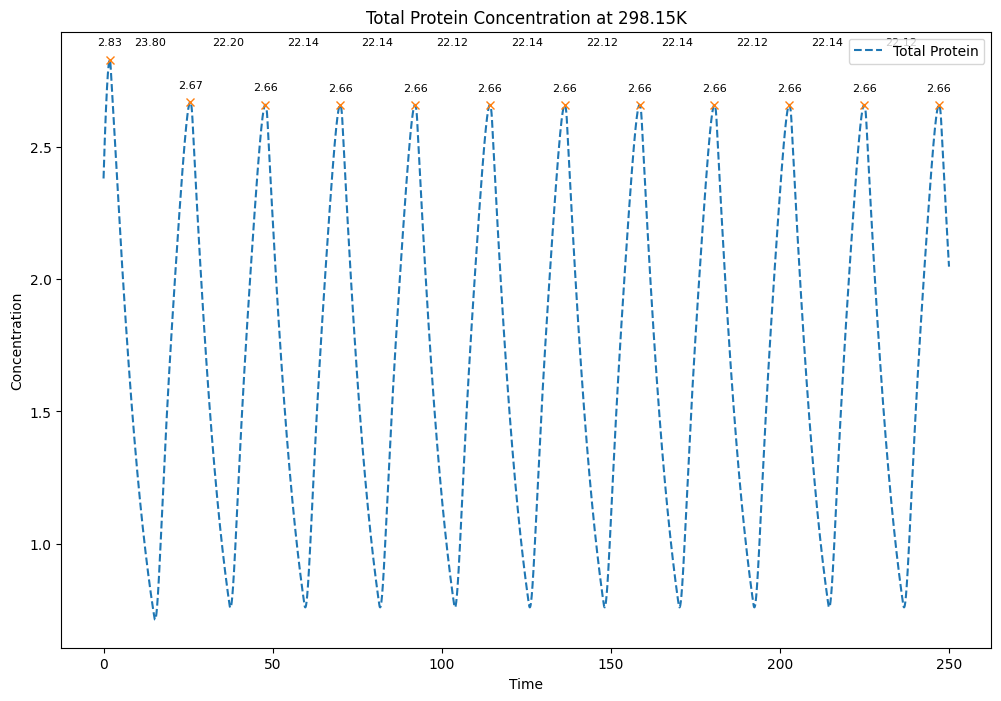

In [12]:
# Main script for 298.15K
Temp = 298.15

t0 = 0
tf = 250

tspan = np.arange(t0, tf, 0.02)
css = [0.68, 1.36, 0.34]

sol = odeint(kaiABC_Rust, css, tspan, args=(Temp,))
T_val = sol[:, 0]
ST_val = sol[:, 1]
S_val = sol[:, 2]

# Calculate total protein concentration over time
total_protein = T_val + ST_val + S_val

# Analyzing the amplitude and period of the total protein
peaks, _ = find_peaks(total_protein)
amplitudes = total_protein[peaks]

if len(peaks) > 1:
    periods = np.diff(tspan[peaks])
    mean_period = np.mean(periods)
else:
    mean_period = np.nan

mean_amplitude = np.mean(amplitudes)

print(f'Mean amplitude of Total Protein: {mean_amplitude}')
print(f'Mean period of Total Protein: {mean_period}')

# Plotting results
plt.figure(figsize=(12, 8))
plt.plot(tspan, total_protein, label='Total Protein', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Total Protein Concentration at 298.15K')

# Highlight peaks of total protein
plt.plot(tspan[peaks], total_protein[peaks], "x")

# Annotate peaks with amplitude and period for total protein
for i in range(len(peaks)):
    plt.annotate(f'{total_protein[peaks[i]]:.2f}', (tspan[peaks[i]], total_protein[peaks[i]]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
    if i > 0:
        plt.annotate(f'{tspan[peaks[i]] - tspan[peaks[i-1]]:.2f}', 
                     ((tspan[peaks[i]] + tspan[peaks[i-1]]) / 2, max(total_protein)), 
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()